# Transformadas de Fourier en sympy:

integrals.transforms._fourier_transform(f, x, k, a, b, name, simplify=True)

donde cada parametro se relaciona de la siguiente manera con la expresion:

 $\mathcal{F}(f(x))=f(k) = a \int_{-\infty}^{\infty} e^{bixk} f(x)\, dx$

In [1]:
# Ejemplos t-omega:
'''
antiFourierSympy = sym.integrals.transforms._fourier_transform(funcion_espectro, x=omega, k=t, a=1/(2* sym.pi), b=1, name= 'anti-Fourier', simplify=False) 
FourierSympy = sym.integrals.transforms._fourier_transform(funcion_t, x=t, k= omega, a=1, b=-1, name= 'Fourier', simplify=False) 
'''
# Ejemplos x-k:
'''
antiFourierSympy = sym.integrals.transforms._fourier_transform(funcion_espectro, x=k, k=x, a=1/(2* sym.pi), b=1, name= 'anti-Fourier', simplify=False) 
FourierSympy = sym.integrals.transforms._fourier_transform(funcion_x, x=x, k=k, a=1, b=-1, name= 'Fourier', simplify=False) 
'''                                                          

"\nantiFourierSympy = sym.integrals.transforms._fourier_transform(funcion_espectro, x=k, k=x, a=1/(2* sym.pi), b=1, name= 'anti-Fourier', simplify=False) \nFourierSympy = sym.integrals.transforms._fourier_transform(funcion_x, x=x, k=k, a=1, b=-1, name= 'Fourier', simplify=False) \n"

# Ejercicio 1 - Espectro plano acotado

## Enunciado Ejercicio 1

$\hat{\phi}(\omega)$ en un $\Delta \omega$ centrado en un $\omega_0$ presenta una amplitud constante $\frac{1}{\Delta \omega}$. En otras $\omega$ es nula.

a) Verifique que el correspondiente $\phi(t) = \mathcal{F}^{-1} \hat\phi(\omega)$ esta dado por:
$$
\phi(t) = \frac{1}{2\pi}\frac{\sin(\frac{\Delta \omega}{2}t)}{\frac{\Delta \omega}{2}t}e^{i \omega_0 t} = \frac{1}{2\pi}\operatorname{sinc}(\frac{\Delta \omega}{2}t)e^{i \omega_0 t} 
$$
b) Grafique $\hat{\phi }(\omega)$ y $\left|\phi(t)\right|$.

c) Sea $T$ un tiempo más prolongado que la duración de cualquier experimento que pueda idear.
Muestre que si $\Delta\omega$ es suficientemente pequeño como para que $\Delta\omega T\ll1$, entonces durante un tiempo menor que $T$, $\phi(t)$ es una función armónica de amplitud y fase casi constante.

## Resolucion Ejercicio 1

In [2]:
import sympy as sym
from sympy.physics import mechanics as mech
# mech.init_vprinting() # notación con punto para la velocidad y punto punto para la aceleración
import warnings
warnings.filterwarnings("ignore")

In [3]:
omega, t, omega_0 = sym.symbols("omega, t, omega_0", real=True)
delta_omega = sym.Symbol(r"\Delta\omega", positive=True)
phi_hat = sym.Function(r'\hat{\phi}')(omega)
phi_omega_expresion = sym.Eq(phi_hat, sym.Piecewise( (0, omega < omega_0 - delta_omega/2),(0, omega > omega_0 + delta_omega/2),(1/delta_omega, True)))
phi_omega_expresion

Eq(\hat{\phi}(omega), Piecewise((0, (omega > \Delta\omega/2 + omega_0) | (omega < -\Delta\omega/2 + omega_0)), (1/\Delta\omega, True)))

Aplico directamente la anti-transformada:

In [4]:
antiFourierSympy = sym.integrals.transforms._fourier_transform(phi_omega_expresion.rhs,
                                                               x= omega, k= t, a= 1/(2* sym.pi), b=1,
                                                               name= 'anti-Fourier', simplify=False
                                                              ) # Antitransformada: x = omega (variable integración), b= +1
antiFourierSympy

Piecewise((I*exp(I*t*(-\Delta\omega/2 + omega_0))/(2*pi*\Delta\omega*t) - I*exp(I*t*(\Delta\omega/2 + omega_0))/(2*pi*\Delta\omega*t), Ne(2*pi*\Delta\omega*t, 0)), (-(-\Delta\omega/2 + omega_0)/(2*pi*\Delta\omega) + (\Delta\omega/2 + omega_0)/(2*pi*\Delta\omega), True))

In [5]:
factorComún = (1/ (2* sym.pi* delta_omega* t) )* sym.exp(sym.I* omega_0* t)
antiFourierSympy.args[0].args[0].expand().collect(factorComún)

(-I*sqrt(exp(I*\Delta\omega*t)) + I/sqrt(exp(I*\Delta\omega*t)))*exp(I*omega_0*t)/(2*pi*\Delta\omega*t)

In [6]:
antiFourierSympy.args[0].args[0].expand().collect(factorComún).args[4]

-I*sqrt(exp(I*\Delta\omega*t)) + I/sqrt(exp(I*\Delta\omega*t))

In [7]:
sym.Eq(sym.Function(r"\phi")(t), (sym.re(antiFourierSympy.args[0].args[0])).simplify())

Eq(\phi(t), sin(\Delta\omega*t/2)*cos(omega_0*t)/(pi*\Delta\omega*t))

In [8]:
omega_0_v = 10 # [s-1]
deltaOmega_v = 4 # [s-1]
magnitudes_substituir= {
    delta_omega: deltaOmega_v,
    omega_0 : omega_0_v,
}
anti_fourier_v = antiFourierSympy.args[0].args[0].subs(magnitudes_substituir)

In [9]:
from matplotlib.style import use as meGusta
meGusta('fivethirtyeight') # estilo de gráficos con grilla y letras grandes

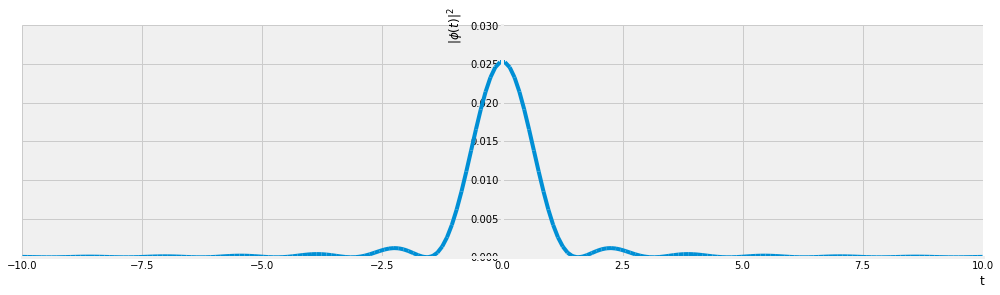

In [10]:
sym.plot(sym.Abs(anti_fourier_v)**2,
         xlim=(-10,10), ylim=(0,0.03), ylabel='$|\phi(t)|^2$',
         size=(14,4), adaptive= False, nb_of_points= 200
        ) # cuadrado del valor absoluto

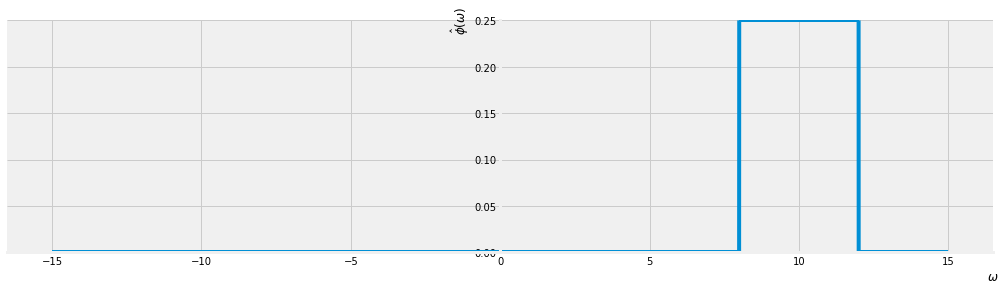

In [11]:
phi_omega_expresion_v = phi_omega_expresion.rhs.subs(magnitudes_substituir)
sym.plot(phi_omega_expresion_v, (omega, -1.5* omega_0_v, 1.5* omega_0_v),
         xlabel='$\omega$', ylabel='$\hat\phi(\omega)$', ylim=(0, 1/deltaOmega_v), size=(14,4)
        )

# Ejercicio 2 - Tren de pulsos cuadrados

a) $\mathcal{F}(af(x) +bg(x)) = \int_{-\infty}^{\infty} e^{-ixk} (af(x) +bg(x))\, dx = \int_{-\infty}^{\infty} e^{-ixk} af(x)\, dx + \int_{-\infty}^{\infty} e^{-ixk} bg(x))\, dx = a \int_{-\infty}^{\infty} e^{-ixk} f(x)\, dx + b\int_{-\infty}^{\infty} e^{-ixk} g(x))\, dx = a\mathcal{F}(f(x)) +b\mathcal{F}(g(x))$ 

b) Me dicen que $\phi(t) = \sum_{n=0}^{N} f(n, t)$. 
* Luego aplicar la transformada seria: $\mathcal{F}(\phi(t)) = \mathcal{F}(\sum_{n=0}^{N} f(n, t))$.
* Por la propiedad vista en a), puedo distribuir la $\mathcal{F}$ en los sumandos.
* Aplicar $\mathcal{F}$ a cada $f(n, t)$ seria $\mathcal{F}(f(n, t))$ donde quiero decir que $f(n, t) = e^{-in\omega\tau}f(0, t)$, entonces como $e^{-in\omega\tau}$ seria una constante en terminos de $t$:  $\mathcal{F}(f(n, t)) = \mathcal{F}(e^{-in\omega\tau}f(0, t)) = e^{-in\omega\tau}\mathcal{F}(f(0, t))$.
* Ahora porque vale que $f(n, t) = e^{-in\omega\tau}f(0, t)$? El termino $e^{-in\omega\tau}$ seria una fase que me desplaza el inicio a $n\tau$?

## c) Resuelvo $\mathcal{F}(f(0, t))$ y $\hat\phi(\nu)$:

In [12]:
import sympy as sym
from sympy.physics import mechanics as mech
# mech.init_vprinting() # notación con punto para la velocidad y punto punto para la aceleración
import warnings
warnings.filterwarnings("ignore")

In [13]:
omega, phi_0 = sym.symbols("omega, phi_0", real=True)
t, n = sym.symbols("t, n", integer=True)
tau, N = sym.symbols("tau, N", positive=True)
delta_t  = sym.Symbol(r"\Delta t", positive=True)
f = sym.Function(r'f')(n, t)
f_n_expresion = sym.Eq(f, sym.Piecewise( (0, t < 0+tau*n),(0, t > delta_t+tau*n),(phi_0, True)))

f_n_expresion

Eq(f(n, t), Piecewise((0, (t < n*tau) | (t > \Delta t + n*tau)), (phi_0, True)))

In [14]:
f_0_expresion = sym.Eq(f.subs(n,0), f_n_expresion.rhs.subs(n,0))
f_0_expresion

Eq(f(0, t), Piecewise((0, (\Delta t < t) | (t < 0)), (phi_0, True)))

Aplico directamente la transformada:

In [15]:
transformada_t = sym.integrals.transforms._fourier_transform(f_0_expresion.rhs, x= t, k= omega, a= 1, b=-1, name= 'Fourier', simplify=False) 
transformada_t

Piecewise((-I*phi_0/omega + I*phi_0*exp(-I*\Delta t*omega)/omega, Ne(omega, 0)), (\Delta t*phi_0, True))

Me quedo con la solucion $\omega \neq 0$, ($\omega$=0 se salvaria con el $\operatorname{sinc}(x)$):

In [16]:
transformada_t.args[0].args[0]

-I*phi_0/omega + I*phi_0*exp(-I*\Delta t*omega)/omega

In [17]:
factor_comun = sym.I*phi_0/omega
transformada_t.args[0].args[0].collect(factor_comun)

I*phi_0*(-1 + exp(-I*\Delta t*omega))/omega

Me quedo con la parte real:

In [18]:
parte_real = sym.re(transformada_t.args[0].args[0].collect(factor_comun))
parte_real

phi_0*sin(\Delta t*omega)/omega

Aca hay un candidato a escribirse como $\operatorname{sinc}(x) = \frac{\sin(x)}{x}$. Tengo que multiplicar y dividir por $\Delta t$. Ahora, vale la pena?

In [19]:
parte_real_sinc = delta_t*parte_real.subs(sym.sin(delta_t*omega)/omega, sym.sinc(delta_t*omega))
parte_real_sinc

\Delta t*phi_0*sinc(\Delta t*omega)

Junto el resultado anterior con la sumatoria, tomando la parte real del coeficiente:

In [20]:
phi_omega = sym.Eq(sym.Function(r"\hat\phi")(omega), sym.Sum(sym.re(sym.exp(-sym.I*n*omega*tau))*parte_real_sinc, (n, 0, N)))
phi_omega

Eq(\hat\phi(omega), Sum(\Delta t*phi_0*cos(n*omega*tau)*sinc(\Delta t*omega), (n, 0, N)))

Pero me piden $\hat\phi(\nu)$, como $\omega = 2\pi \nu$ :

In [21]:
nu = sym.Symbol("nu", real=True)
phi_nu = sym.Eq(sym.Function(r"\hat\phi")(nu), phi_omega.rhs.subs(omega, 2*sym.pi*nu))
phi_nu

Eq(\hat\phi(nu), Sum(\Delta t*phi_0*cos(2*pi*n*nu*tau)*sinc(2*pi*\Delta t*nu), (n, 0, N)))

Como quedaria si no pido la parte real:

In [22]:
phi_omega_c = sym.Eq(sym.Function(r"\hat\phi")(omega), sym.Sum(sym.exp(-sym.I*n*omega*tau)*transformada_t.args[0].args[0], (n, 0, N)))
phi_nu_c = sym.Eq(sym.Function(r"\hat\phi")(nu), phi_omega_c.rhs.subs(omega, 2*sym.pi*nu))
phi_nu_c

Eq(\hat\phi(nu), Sum((-I*phi_0/(2*pi*nu) + I*phi_0*exp(-2*I*pi*\Delta t*nu)/(2*pi*nu))*exp(-2*I*pi*n*nu*tau), (n, 0, N)))

## d) Dependencia con $\tau$

Seria el $\cos$ el termino que depende $\tau$, tal que si $\nu_1 = \frac{1}{\tau}$ y $\nu_p = p\nu_1$ entonces $\cos(2\pi n \nu_p \tau) = \cos(2\pi n p) = 1$ 

In [23]:
from matplotlib.style import use as meGusta
meGusta('fivethirtyeight') # estilo de gráficos con grilla y letras grandes

In [24]:
phi_0_v = 1 # [m?]
delta_t_v = 1 # [s]
tau_v = 4 # [s]
magnitudes_substituir= {
    delta_t: delta_t_v,
    phi_0 : phi_0_v,
    tau : tau_v
}

In [59]:
phi_nu.rhs.args[0].args[2]

cos(2*pi*n*nu*tau)

In [25]:
cos_phi_nu = phi_nu.rhs.args[0].args[2].subs(magnitudes_substituir)
suma_cos_phi_nu = cos_phi_nu.subs(n,0)+cos_phi_nu.subs(n,1)+cos_phi_nu.subs(n,2)+cos_phi_nu.subs(n,3)
suma_cos_phi_nu

cos(8*pi*nu) + cos(16*pi*nu) + cos(24*pi*nu) + 1

Como $\tau = 4$ esperaria ver los picos en $\nu = \frac{p}{4}$:

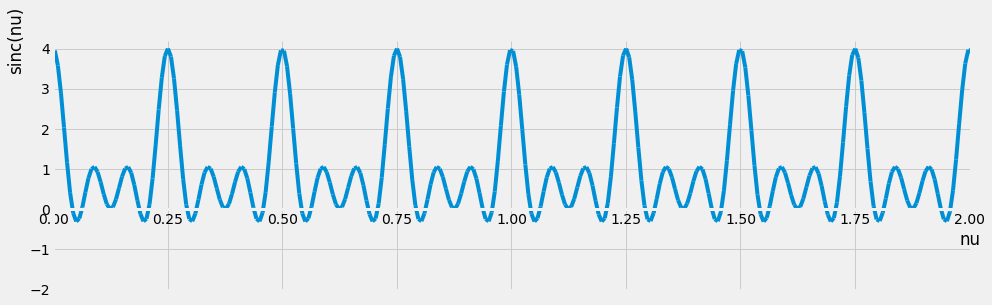

In [60]:
sym.plot(suma_cos_phi_nu, xlim=(0,2), ylim=(-2,4.2), ylabel='sinc(nu)', size=(14,4), adaptive= False, nb_of_points= 3000)

## e) Depedencia de $\Delta t$

Seria el $\operatorname{sinc}$ el termino que depende $\Delta t$, veo si se cumple la relacion de $0 < \nu < \frac{1}{\Delta t}$

In [27]:
sinc_phi_nu = phi_nu.rhs.args[0].args[3].subs(magnitudes_substituir)
sinc_phi_nu

sinc(2*pi*nu)

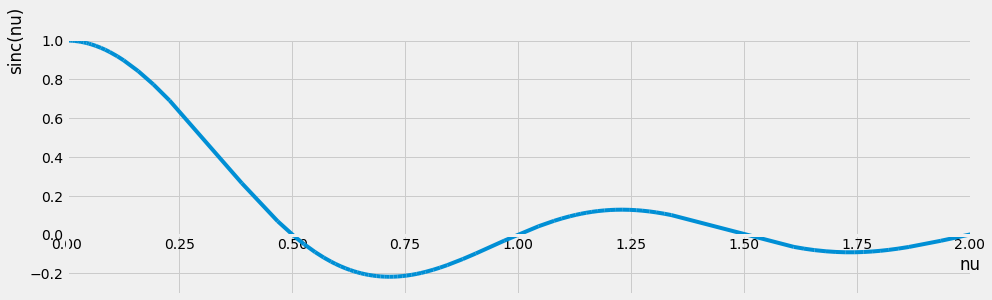

In [28]:
# 1/delta t = 0.5
sym.plot(sinc_phi_nu, xlim=(0,2), ylim=(-0.3,1), ylabel='sinc(nu)', size=(14,4))

## f) Me piden analizar el ancho de banda $\Delta \nu$:

En este caso, se que $T = \tau(N+1)$ entonces $\Delta \omega T = \Delta \omega \tau(N+1)$, y como $2\pi\Delta \nu = \Delta \omega$, tengo que $\Delta \nu \Delta T = 2\pi \Delta \nu (N+1)\tau$

## Graficos para entender el comportamiento de las $\phi$

Grafico $f(0, t)$

In [29]:
f_0_v = f_0_expresion.rhs.subs(magnitudes_substituir)

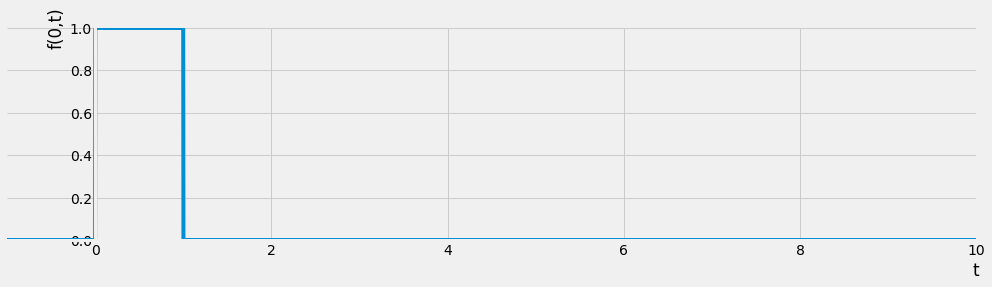

In [30]:
sym.plot(f_0_v, xlim=(-1,10), ylim=(0,1), ylabel='f(0,t)', size=(14,4))

Quiero ver si se cumple $f(2, t) =  e^{-i2\omega\tau} f(0, t)$

$\Im(e^{-i2\omega\tau})$ deberia ser la fase, en este caso deberia ser 2?

In [31]:
#fase_2_v = sym.im(sym.exp(-sym.I*n*omega*tau).subs(magnitudes_substituir).subs(n, 2)).subs(omega, 1/2)
fase_2_v = sym.exp(-sym.I*n*omega*tau).subs(magnitudes_substituir).subs(n, 2).subs(omega, 1/4)
#f_2_v = f_0_v*fase_2_v
f_2_v = f_0_v*sym.im(fase_2_v)
f_2_v

-0.909297426825682*Piecewise((0, (t > 1) | (t < 0)), (1, True))

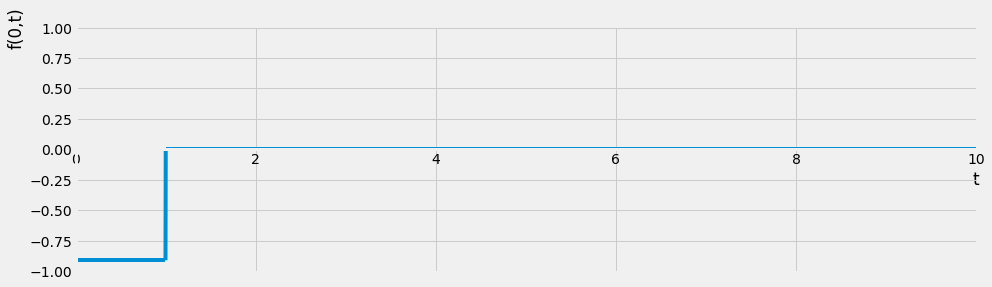

In [32]:
sym.plot(f_2_v, xlim=(0,10), ylim=(-1,1), ylabel='f(0,t)', size=(14,4))

Esperaba que el cuadrado este centrado en 2 y con amplitud $\phi_0$

Pruebo definiendo $f(0,t)$ usando Heaviside:

In [33]:
f_Heaviside = sym.Eq(f.subs(n, 0),phi_0* (sym.Heaviside( t + delta_t) - sym.Heaviside( t - delta_t)), evaluate= False)
f_Heaviside

Eq(f(0, t), phi_0*(-Heaviside(-\Delta t + t) + Heaviside(\Delta t + t)))

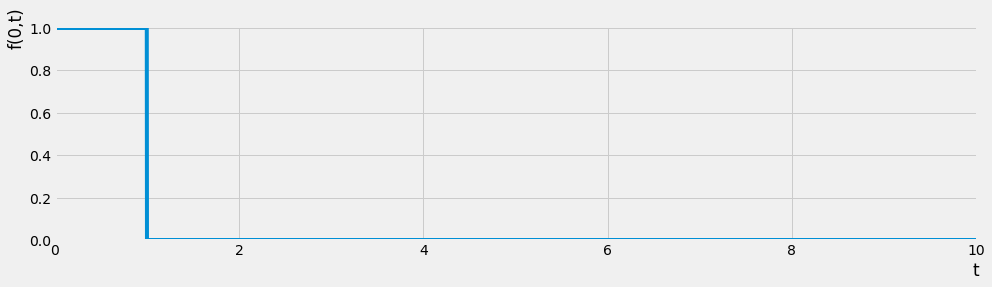

In [34]:
f_Heaviside_v = f_Heaviside.rhs.subs(magnitudes_substituir)
sym.plot(f_Heaviside_v, xlim=(0,10), ylim=(0,1), ylabel='f(0,t)', size=(14,4))

In [35]:
f_Heaviside_2_v = f_Heaviside_v*fase_2_v
f_Heaviside_2_v

(-Heaviside(t - 1) + Heaviside(t + 1))*exp(-2.0*I)

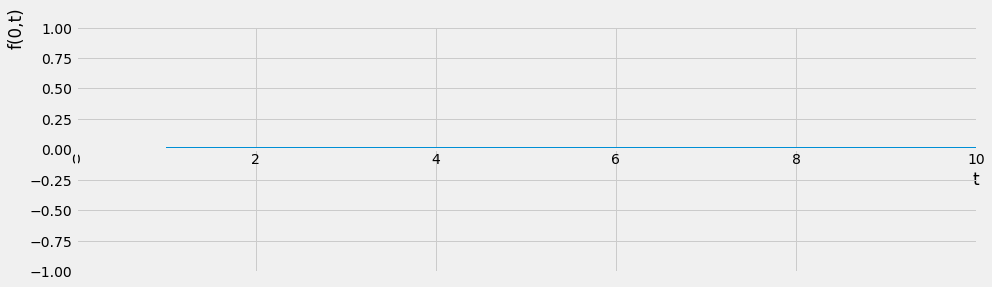

In [36]:
sym.plot(f_Heaviside_2_v, xlim=(0,10), ylim=(-1,1), ylabel='f(0,t)', size=(14,4))

Grafico $|\hat\phi(\nu)|^2$:

Veo los primero 10 terminos:

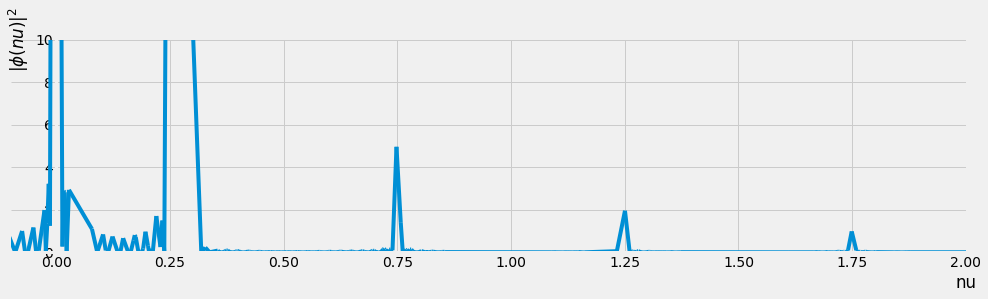

In [54]:
phi_nu_n = phi_nu.rhs.args[0].subs(magnitudes_substituir)
def phi_nu_s(i):
  phi_nu_sumatoria = 0
  for j in range(i+1):
    phi_nu_sumatoria =  phi_nu_sumatoria + phi_nu_n.subs(n,j)
  return phi_nu_sumatoria
phi_nu_v = phi_nu_s(10)
sym.plot(phi_nu_v**2,
         xlim=(-0.1,2), ylim=(0,10), ylabel='$|\phi(nu)|^2$',
         size=(14,4))

Los picos no deberian ser en cada $\frac{p}{4}$?